# Metrics Notebook
By SIS

Imports:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import file_organizers.file_reading as fr
import threshold_metrics as tm
import metrics_plotting as mp

Define the dataset type, test split, folder and file name for the inference file:

In [2]:
dataset_type = '550k'
test_split = 0

In [3]:
inference_folder = '/Users/sishitan/Documents/Scripts/qusi_project/qusi/inferences/'
inference_file = f'results_ts{test_split}_{dataset_type}_with_tags.csv'

## 1. Confusion Matrix
Define the threshold value:

In [4]:
# Getting cuts based on threshold
threshold_value = 0.5
inference_df = fr.read_inference_with_tags_and_labels(inference_folder + inference_file)
inference_with_threshold = tm.threshold_prediction_setter(inference_df, threshold_value)
true_labels = inference_with_threshold['true_label']
predictions = inference_with_threshold['prediction']

### 1.1. Confusion Matrix with Absolute numbers (per light curve)

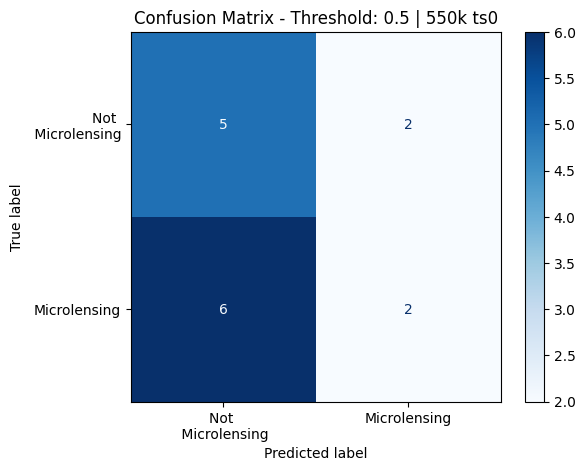

In [5]:
# Confusion Matrix
mp.confusion_matrix_plotter(true_labels_=true_labels, predictions_=predictions,
                            inference_path_=inference_folder, dataset_type_=dataset_type, test_split_=test_split,
                            threshold_value_=threshold_value,
                            show_plot_=True)

### 1.2 Normalized Confusion Matrix

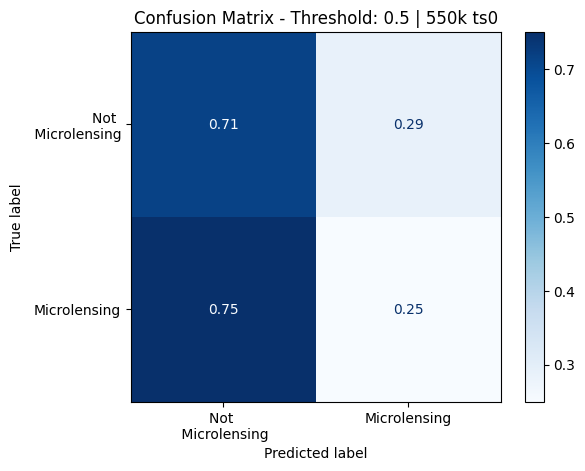

In [6]:
# Normalized Confusion Matrix
mp.confusion_matrix_plotter(true_labels_=true_labels, predictions_=predictions,
                            inference_path_=inference_folder, dataset_type_=dataset_type, test_split_=test_split,
                            threshold_value_=threshold_value,
                            show_plot_=True, should_normalize_='true')

## 2. Print TP, FP, TN, FN
Based on threshold value above

In [7]:
# Printing the performance metrics
true_positives, false_positives, true_negatives, false_negatives = tm.performance_calculator(true_labels_=true_labels, predictions_=predictions)
print('True Positives: ', true_positives)
print('False Positives: ', false_positives)
print('True Negatives: ', true_negatives)
print('False Negatives: ', false_negatives)

True Positives:  2
False Positives:  2
True Negatives:  5
False Negatives:  6


## 3. Cumulative distribution
### 3.1 Cumulative Distribution Microlensing VS Non-microlensing

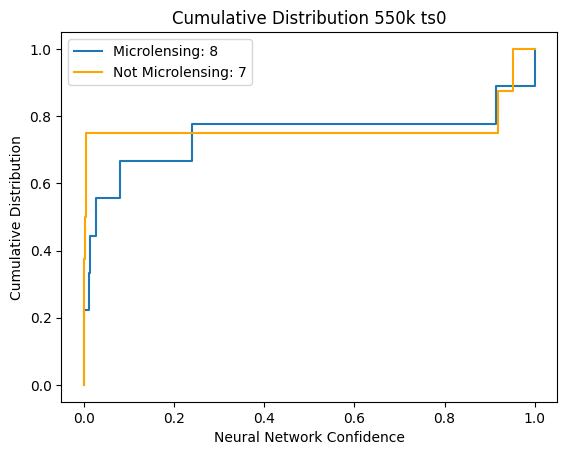

In [8]:
# Cumulative distribution
mp.inference_cumulative_distribution(inference_with_threshold_=inference_with_threshold,
                                     inference_path_=inference_folder, dataset_type_=dataset_type, test_split_=test_split,
                                     show_plot_=True)

### 3.2 Cumulative Distribution per Tag

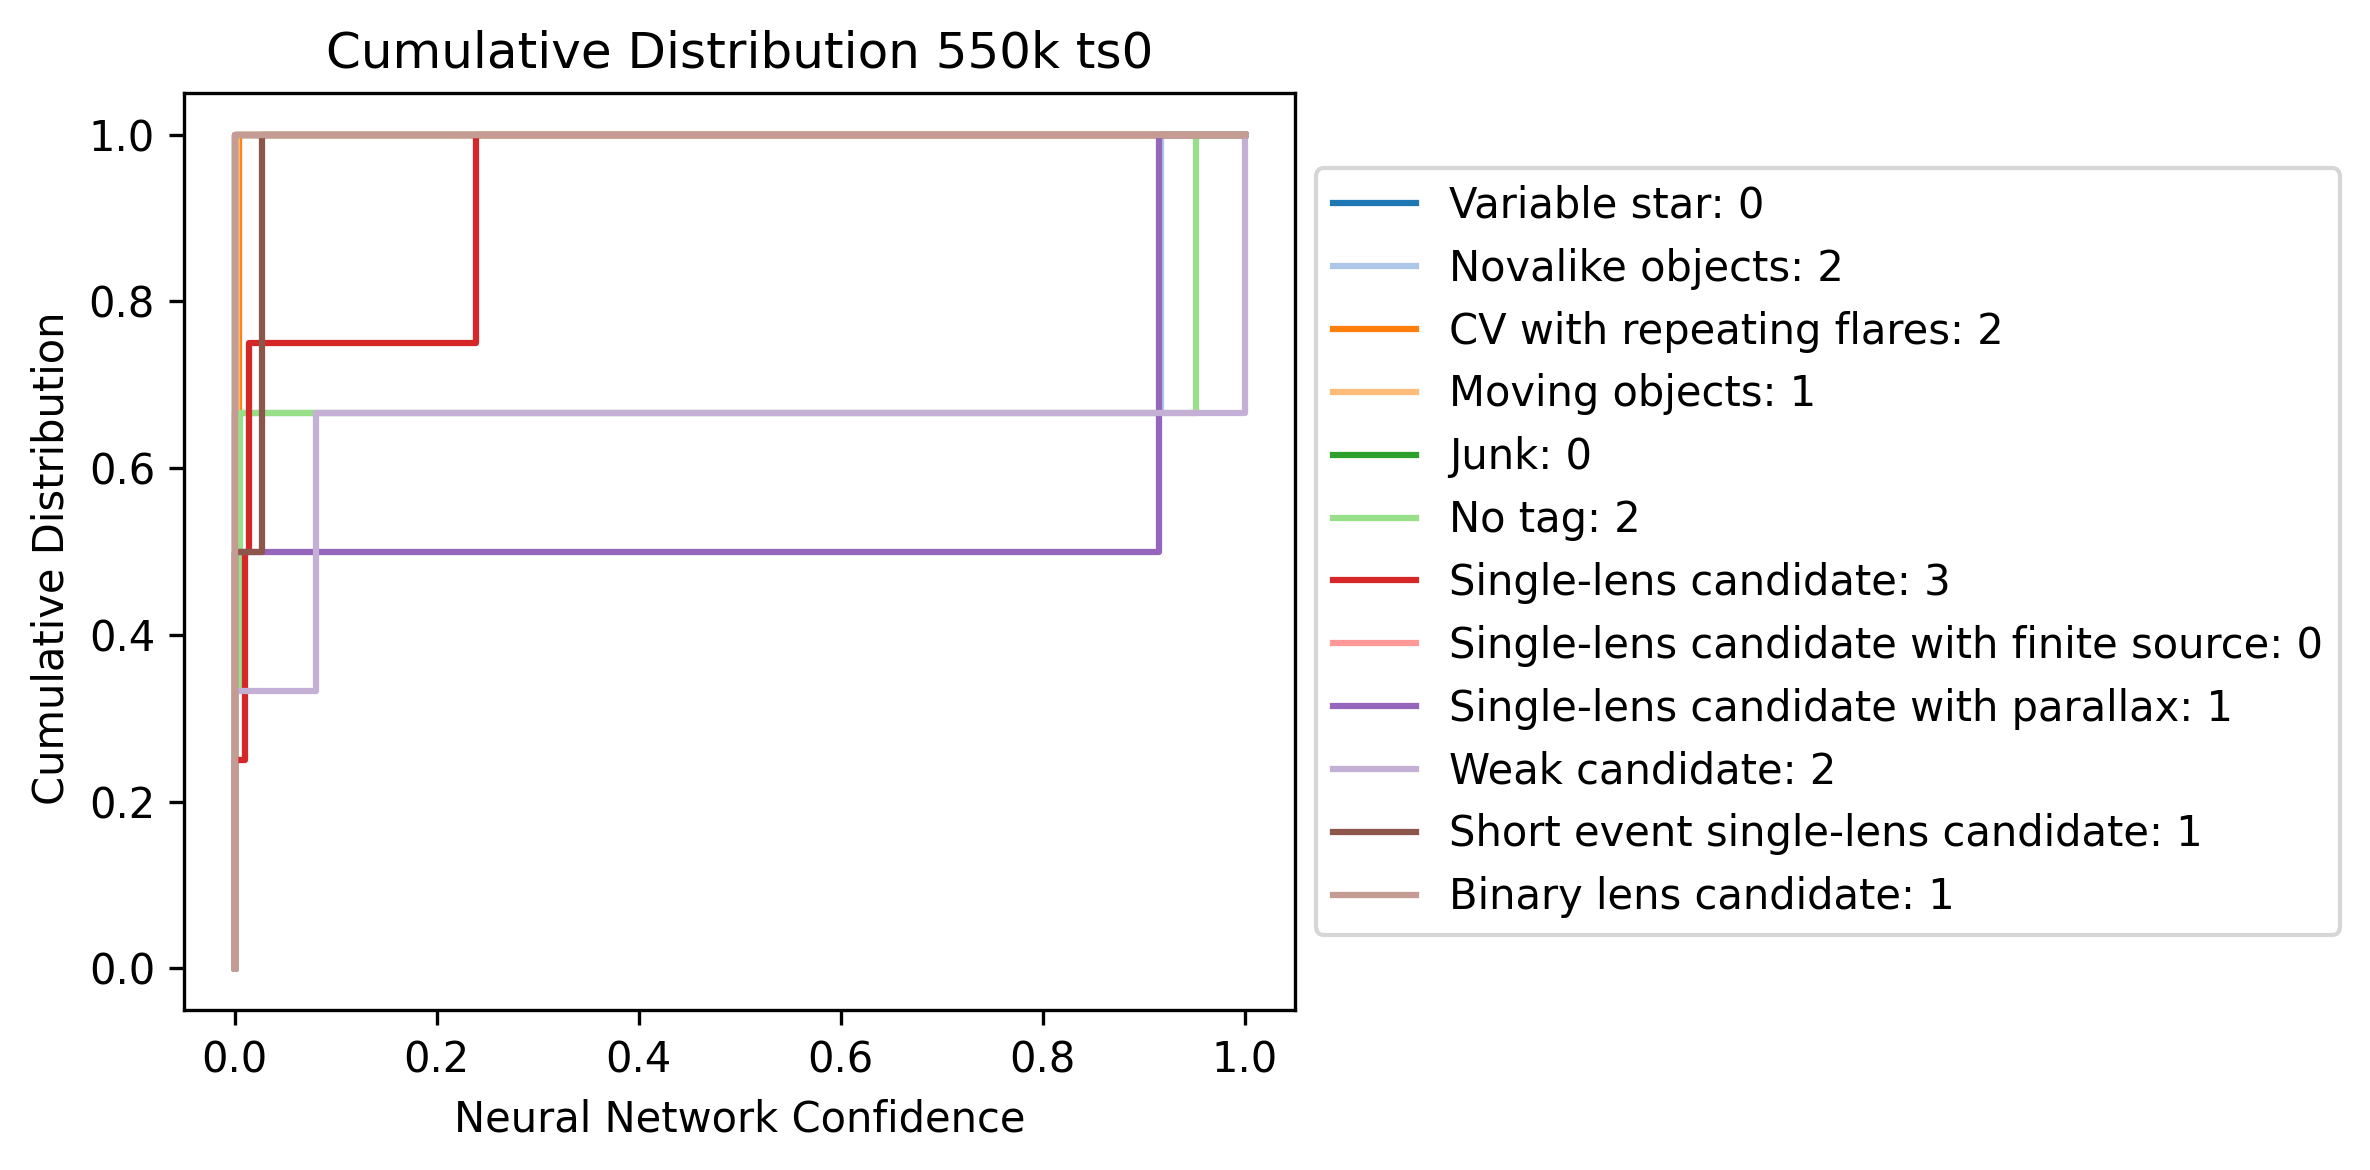

In [9]:
mp.inference_cumulative_distribution_per_tag(inference_with_threshold_=inference_with_threshold,
                                             inference_path_=inference_folder, dataset_type_=dataset_type, test_split_=test_split,
                                             show_plot_=True)
